# Proyecto de programación: El indice de marginalización de México

---
<summary>
    <font size="5"> Maestría en Ciencias de Datos </font>
</summary>
<summary>
    <font size="5"> Universidad de Sonora </font>
</summary>
<br>
<summary>
    <font size="4"> Propedeutico: Programación </font> 
</summary>
<summary>
    <font size="4"> Profesor: Dr. Julio Waissman Vilanova </font>
</summary>
<summary>
    <font size="4"> Alumna: Vesna Camile Pivac Alcaraz </font>
</summary>

---

## Descarga de datos

In [1]:
# !pip install openpyxl
# !pip install xlrd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_excel('http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls',sheet_name='IMM_2020')  

In [4]:
df.head()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042


## Análisis de datos

In [5]:
df.describe()

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19.215472,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,7.367340,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,1.000000,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,14.000000,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,20.000000,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,24.000000,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,32.000000,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


En el análisis del DataFrame podemos observar las siguientes características mas relevantes de acuerdo a los datos:
- El número de municipios en el estudio es de 2,469.
- La media indica que, en promedio, los municipios tienen una población total de alrededor de 51,038 habitantes. El porcentaje promedio de personas analfabetas es del 10.16%, y el promedio de municipios con acceso a servicios básicos es del 45.85%.
- La desviación estándar muestra la variabilidad de los datos. Por ejemplo, la desviación estándar de la población total es de aproximadamente 146,990 habitantes, lo que indica una amplia gama de tamaños de municipios.
- Los valores mínimos revelan que algunos municipios tienen poblaciones muy pequeñas, con menos de 100 habitantes. Además, se observan niveles bajos de analfabetismo y acceso a servicios básicos.
- Los valores máximos indican la presencia de municipios con poblaciones muy grandes, llegando a más de 1,922,523 habitantes. También se encuentran municipios con niveles altos de analfabetismo y falta de acceso a servicios básicos.
Estas estadísticas brindan una visión general de las características del índice de marginación en los municipios de México, permitiendo identificar patrones y tendencias en los datos.

## Análisis de Marginalización: Porcentaje de Municipios por Estado

In [6]:
distribucion_df = df.groupby(['NOM_ENT','GM_2020'])[['NOM_MUN']].count().reset_index()
group_totals = distribucion_df.groupby('NOM_ENT')['NOM_MUN'].transform('sum')

In [7]:
distribucion_df['Porcentaje'] = (distribucion_df['NOM_MUN'] / group_totals) * 100
distribucion_df = distribucion_df.rename(columns={'NOM_ENT':'Estado', 'GM_2020': 'Grado de marginación', 'NOM_MUN':'Municipios'})
distribucion_df.head()

,Estado,Grado de marginación,Municipios,Porcentaje
0,Aguascalientes,Muy bajo,11,100.000000
1,Baja California,Medio,1,16.666667
2,Baja California,Muy bajo,5,83.333333
3,Baja California Sur,Muy bajo,5,100.000000
4,Campeche,Alto,2,16.666667


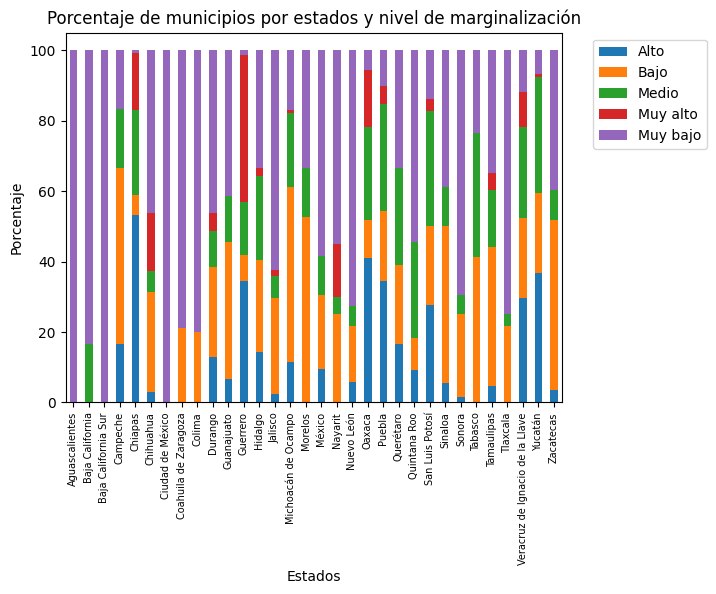

In [8]:
grouped = distribucion_df.groupby(['Estado', 'Grado de marginación'])['Porcentaje'].sum().unstack()

grouped.plot(kind='bar', stacked=True)

plt.title('Porcentaje de municipios por estados y nivel de marginalización')
plt.xlabel('Estados')
plt.ylabel('Porcentaje')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=7) 
plt.savefig('MarginalizacionMunicipios.png', bbox_inches='tight')
plt.show()

##  Análisis de Marginalización: Porcentaje de Población por Estado

In [9]:
distribucion_poblacion_df = df.groupby(['NOM_ENT','GM_2020'])[['POB_TOT']].sum().reset_index()
total_por_estado = distribucion_poblacion_df.groupby('NOM_ENT')['POB_TOT'].transform('sum')
distribucion_poblacion_df['Porcentaje'] = (distribucion_poblacion_df['POB_TOT'] / total_por_estado) * 100
distribucion_poblacion_df = distribucion_poblacion_df.rename(columns={'NOM_ENT':'Estado', 'GM_2020': 'Grado de marginación', 'POB_TOT':'Población'})
distribucion_poblacion_df.head()

,Estado,Grado de marginación,Población,Porcentaje
0,Aguascalientes,Muy bajo,1425607,100.000000
1,Baja California,Medio,117568,3.119325
2,Baja California,Muy bajo,3651452,96.880675
3,Baja California Sur,Muy bajo,798447,100.000000
4,Campeche,Alto,78627,8.469424


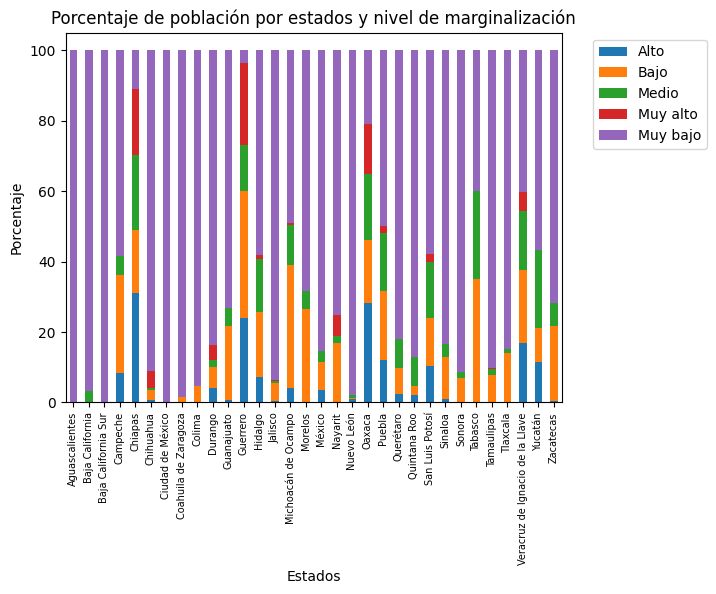

In [10]:
grouped = distribucion_poblacion_df.groupby(['Estado', 'Grado de marginación'])['Porcentaje'].sum().unstack()

grouped.plot(kind='bar', stacked=True)

plt.title('Porcentaje de población por estados y nivel de marginalización')
plt.xlabel('Estados')
plt.ylabel('Porcentaje')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=7) 
plt.savefig('MarginalizacionPoblacion.jpg', bbox_inches='tight')
plt.show()

## Análisis de Marginalización de Porcentaje de Municipios y Población por Estado

**¿Hay coincidencias entra la gráficas anteriores?  ¿Algún hallazgo?**
 
En el análisis de la marginalización por población en los estados de México, se observa una diversidad de situaciones. Un hallazgo relevante es que un gran porcentaje de la población de los municipios presenta un nivel de marginalización muy bajo. Esto sugiere que, a pesar de las dificultades socioeconómicas que pueden enfrentar algunas regiones, existe una proporción significativa de la población que ha logrado superar estas barreras.

Sin embargo, es importante destacar que existen diferencias notables entre los estados. Por ejemplo, Chiapas, Querétaro, Oaxaca y Veracruz se encuentran entre los cinco estados con el menor porcentaje de población con marginalización muy baja. Al mismo tiempo, estos estados presentan el mayor porcentaje de población con un nivel de marginalización "Muy Alto". Esta dualidad refleja la complejidad de la marginalización en México, donde coexisten áreas de relativa prosperidad y áreas de profunda desventaja social.

Al observar la marginalización a nivel municipal, se pueden apreciar aún más matices. Aguascalientes, Baja California Sur y la Ciudad de México son los únicos estados que presentan un único nivel de marginalización, siendo este el más bajo. Esto sugiere que estos estados han logrado un grado de equidad social más alto que otros.

Por otro lado, Querétaro se destaca como el estado con el mayor porcentaje de población con marginalización muy alta. Este hallazgo es preocupante y señala la necesidad de políticas y programas dirigidos a reducir la marginalización en este estado.

## Relación de porcentaje de analfabetismo respecto al porcentaje de poblaciones en localidades de menos de 5,000 habitantes.

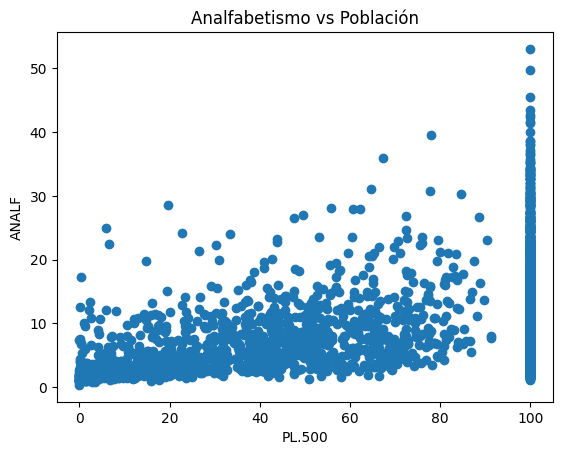

In [11]:
plt.scatter(x=df["PL.5000"], y=df["ANALF"])
plt.xlabel('PL.500')
plt.ylabel('ANALF')
plt.title('Analfabetismo vs Población')
plt.show()

## Análisis de Correlación

Para descubrir qué variables exhiben una correlación más fuerte con el porcentaje de analfabetismo en individuos de más de 15 años, es esencial calcular una matriz de correlaciones que abarque todas las variables relevantes. La matriz de correlaciones es un instrumento esencial en el análisis de datos, ya que permite identificar patrones, dependencias y tendencias entre variables. Al inspeccionar la matriz de correlaciones, es posible determinar qué variables están fuertemente vinculadas entre sí y cuáles pueden considerarse independientes. Esto proporciona información valiosa para el análisis que deseamos llevar a cabo.

Para poder calcular estas relaciones podemos usar la funcion `corr` en el dataframe con solo las columnas que nos interesan.

In [12]:
num_df = df[['POB_TOT', 'ANALF', 'SBASC',
       'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM',
       'IM_2020']]

In [13]:
matriz_corr = num_df.corr()
matriz_corr

,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020
POB_TOT,1.000000,-0.236801,-0.387466,-0.111017,-0.105180,-0.092102,-0.161628,-0.206148,-0.422541,-0.410937,0.315036
ANALF,-0.236801,1.000000,0.779053,0.347537,0.351523,0.360644,0.644960,0.658532,0.449324,0.620011,-0.847822
SBASC,-0.387466,0.779053,1.000000,0.259337,0.296920,0.269822,0.548058,0.521014,0.598548,0.702248,-0.768872
OVSDE,-0.111017,0.347537,0.259337,1.000000,0.529746,0.219278,0.279222,0.374002,0.205200,0.204174,-0.566430
OVSEE,-0.105180,0.351523,0.296920,0.529746,1.000000,0.343723,0.501319,0.308139,0.231066,0.197733,-0.636501
OVSAE,-0.092102,0.360644,0.269822,0.219278,0.343723,1.000000,0.391056,0.319650,0.189617,0.276074,-0.581819
OVPT,-0.161628,0.644960,0.548058,0.279222,0.501319,0.391056,1.000000,0.615184,0.338568,0.477667,-0.772474
VHAC,-0.206148,0.658532,0.521014,0.374002,0.308139,0.319650,0.615184,1.000000,0.269036,0.580601,-0.731332
PL.5000,-0.422541,0.449324,0.598548,0.205200,0.231066,0.189617,0.338568,0.269036,1.000000,0.575018,-0.586803
PO2SM,-0.410937,0.620011,0.702248,0.204174,0.197733,0.276074,0.477667,0.580601,0.575018,1.000000,-0.699429


Podemos ver que no existe una gran relación entre los datos de analfabetismo con los de PL.500 pero si podemos decir que existe una alta correlación con SBASC.

POB_TOT (Población total) tiene una correlación negativa con ANALF (Analfabetismo), SBASC (Sin Básicos), OVSDE, OVSEE, OVSAE, OVPT, VHAC, PL.5000 y PO2SM. Esto significa que a medida que la población total aumenta, estos indicadores tienden a disminuir. Sin embargo, la correlación es relativamente débil (todos los coeficientes son menores a -0.5).

ANALF (Analfabetismo) tiene una correlación positiva fuerte con SBASC (Sin Básicos), OVSDE, OVSEE, OVSAE, OVPT, VHAC, PL.5000 y PO2SM. Esto significa que a medida que el analfabetismo aumenta, estos indicadores también tienden a aumentar. La correlación más fuerte es con SBASC (Sin Básicos), con un coeficiente de 0.779053.

IM_2020 (Índice de Marginalidad 2020) tiene una correlación negativa fuerte con todas las demás variables, excepto POB_TOT. Esto significa que a medida que el índice de marginalidad aumenta, estos indicadores tienden a disminuir. La correlación más fuerte es con ANALF (Analfabetismo), con un coeficiente de -0.847822.

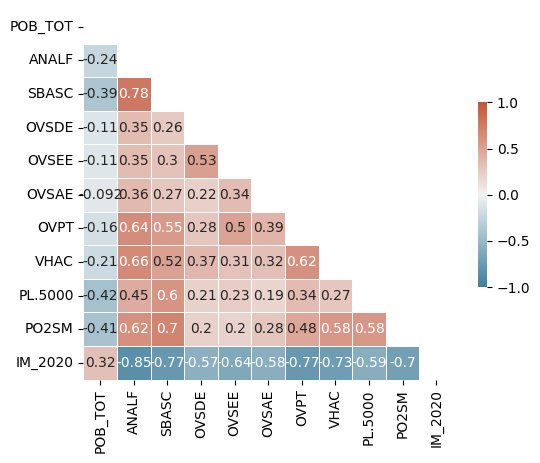

In [14]:
# Crear una máscara para el triángulo superior de la matriz de correlación (opcional)
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

# Crear una paleta de colores divergente para el mapa de calor
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibujar el mapa de calor de la matriz de correlación
sns.heatmap(matriz_corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

## Propuesta de indicadores: Calidad de Vida

Existe la posibilidad de crear un indicador innovador que pueda proporcionar una visión más profunda del bienestar de la población. Este indicador, que podríamos denominar "Índice de Calidad de Vida", podría ser una amalgama de varios factores que, en conjunto, ofrecen una imagen más completa de la calidad de vida de una población.
Este indicador sera formado por la combinación de los siguientes elementos:
- El inverso del porcentaje de analfabetismo (ANALF): Este componente refleja la importancia de la educación en la calidad de vida de las personas. Un menor porcentaje de analfabetismo suele indicar un mayor nivel de educación, lo que a su vez puede contribuir a una mejor calidad de vida.

- El inverso del porcentaje de personas sin servicios básicos (SBASC): Este elemento subraya la relevancia de tener acceso a servicios esenciales. Un menor porcentaje de personas sin servicios básicos sugiere un mayor acceso a estos servicios, lo que puede mejorar la calidad de vida.

- El inverso del porcentaje de personas con ingresos por debajo de 2 salarios mínimos (PO2SM): Este factor pone de manifiesto la importancia de la estabilidad económica. Un menor porcentaje de personas con bajos ingresos puede indicar una mejor situación económica, lo que puede mejorar la calidad de vida.

In [32]:
df_final = df[['NOM_ENT','NOM_MUN','POB_TOT','ANALF','SBASC','PO2SM','GM_2020']]

In [33]:
df_final.loc[:, 'Indice_de_Calidad_de_Vida'] = (1/df_final['ANALF'] + 1/df_final['SBASC'] + 1/df_final['PO2SM']) / 3

/var/folders/r2/wrdzf10d2lq1sjgp521xsvrm0000gn/T/ipykernel_60718/9538063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, 'Indice_de_Calidad_de_Vida'] = (1/df_final['ANALF'] + 1/df_final['SBASC'] + 1/df_final['PO2SM']) / 3


In [34]:
df_final.head()

,NOM_ENT,NOM_MUN,POB_TOT,ANALF,SBASC,PO2SM,GM_2020,Indice_de_Calidad_de_Vida
0,Aguascalientes,Aguascalientes,948990,1.644738,20.367220,54.226594,Muy bajo,0.225180
1,Aguascalientes,Asientos,51536,3.526405,33.906364,78.565471,Muy bajo,0.108599
2,Aguascalientes,Calvillo,58250,4.491509,42.482450,79.259777,Muy bajo,0.086266
3,Aguascalientes,Cosío,17000,3.144867,27.696745,81.726369,Muy bajo,0.122107
4,Aguascalientes,Jesús María,129929,2.380588,26.692477,56.748753,Muy bajo,0.158383


In [36]:
matriz_corr2 = df_final[['POB_TOT','ANALF','SBASC','PO2SM','Indice_de_Calidad_de_Vida']].corr()
matriz_corr2

,POB_TOT,ANALF,SBASC,PO2SM,Indice_de_Calidad_de_Vida
POB_TOT,1.000000,-0.236801,-0.387466,-0.410937,0.454760
ANALF,-0.236801,1.000000,0.779053,0.620011,-0.638818
SBASC,-0.387466,0.779053,1.000000,0.702248,-0.734660
PO2SM,-0.410937,0.620011,0.702248,1.000000,-0.699998
Indice_de_Calidad_de_Vida,0.454760,-0.638818,-0.734660,-0.699998,1.000000


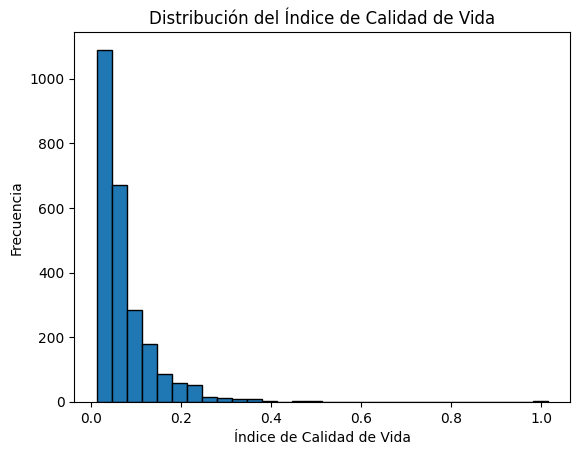

In [37]:
plt.hist(df_final['Indice_de_Calidad_de_Vida'], bins=30, edgecolor='black')
plt.title('Distribución del Índice de Calidad de Vida')
plt.xlabel('Índice de Calidad de Vida')
plt.ylabel('Frecuencia')
plt.show()

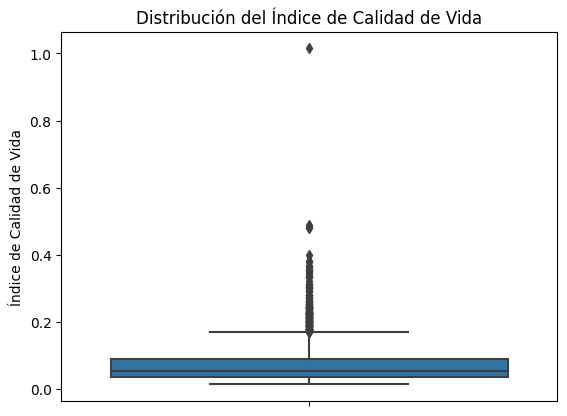

In [38]:
sns.boxplot(y=df_final['Indice_de_Calidad_de_Vida'])
plt.title('Distribución del Índice de Calidad de Vida')
plt.ylabel('Índice de Calidad de Vida')
plt.show()

In [39]:
df_final.loc[df_final['Indice_de_Calidad_de_Vida']>0.5]

,NOM_ENT,NOM_MUN,POB_TOT,ANALF,SBASC,PO2SM,GM_2020,Indice_de_Calidad_de_Vida
285,Ciudad de México,Benito Juárez,434153,0.353446,5.535137,28.453113,Muy bajo,1.015033


In [28]:
print('[',df_final.Indice_de_Calidad_de_Vida.min(),',',df_final.Indice_de_Calidad_de_Vida.max(),']')

[ 0.013963847880514545 , 1.0150328116873073 ]


In [30]:
np.mean(df_final['Indice_de_Calidad_de_Vida'])

0.07304525859997939

## Conclusiones

Durante este proyecto de leyo el archivo del indice de marginalización en México al cual le aplicamos distintos procedimientos para poder extraer más de información, durante el proyecto de exploraron diversas variables relacionadas con la marginación, como el analfabetismo, la falta de educación básica, las condiciones de vivienda precarias y los ingresos bajos.

En el análisis del indicador de calidad, se puede observar una notable concentración en el rango de 0.01 a 0.2, lo cual indica una baja calidad de vida en la mayoría de los municipios. Sin embargo, destaca un único municipio con una calidad de vida excepcionalmente alta, alcanzando el valor de 1.015, el cual pertenece a la Ciudad de México.

Estos resultados revelan la necesidad de mejorar nuestro sistema socioeconómico, ya que la gran parte de los datos se concentra alrededor de 0.073. Esta cifra refleja la existencia de importantes desafíos en materia de calidad de vida que deben ser abordados de manera urgente.

El hecho de que solo un municipio destaque con una calidad de vida superior nos muestra la importancia de identificar y aprovechar las lecciones que se pueden extraer de este caso exitoso. Es evidente que se requieren políticas, recursos y esfuerzos para fomentar un mayor bienestar en todas las localidades.